In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

Path of data

In [2]:
data_train_path = 'Fruits/train'
data_test_path = 'Fruits/test'
data_val_path = 'Fruits/validation'

In [3]:
img_width = 180
img_height =180 

Creating train, test, validation data set

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 143 files belonging to 2 classes.


In [5]:
data_cat = data_train.class_names
data_cat

['apple', 'banana']

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 19 files belonging to 2 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 19 files belonging to 2 classes.


Showing images

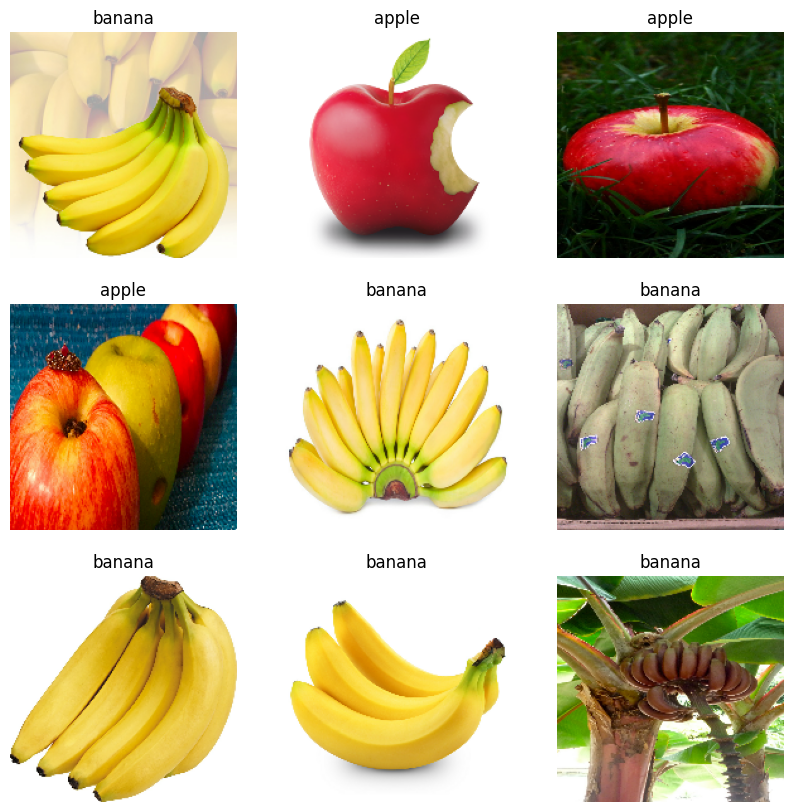

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

Creating model

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
5/5 [==============================] - 9s 741ms/step - loss: 4.6244 - accuracy: 0.4476 - val_loss: 1.6417 - val_accuracy: 0.5263
Epoch 2/25
5/5 [==============================] - 6s 647ms/step - loss: 0.9272 - accuracy: 0.6084 - val_loss: 0.5655 - val_accuracy: 0.6316
Epoch 3/25
5/5 [==============================] - 6s 617ms/step - loss: 0.4679 - accuracy: 0.8112 - val_loss: 0.3761 - val_accuracy: 0.8947
Epoch 4/25
5/5 [==============================] - 6s 650ms/step - loss: 0.3389 - accuracy: 0.9021 - val_loss: 0.2294 - val_accuracy: 0.8421
Epoch 5/25
5/5 [==============================] - 6s 626ms/step - loss: 0.2378 - accuracy: 0.9231 - val_loss: 0.2049 - val_accuracy: 0.8947
Epoch 6/25
5/5 [==============================] - 6s 615ms/step - loss: 0.1884 - accuracy: 0.9161 - val_loss: 0.2192 - val_accuracy: 0.8947
Epoch 7/25
5/5 [==============================] - 6s 594ms/step - loss: 0.1651 - accuracy: 0.9371 - val_loss: 0.1781 - val_accuracy: 0.8947
Epoch 8/25
5/5 [====

Plotting

Text(0.5, 1.0, 'Loss')

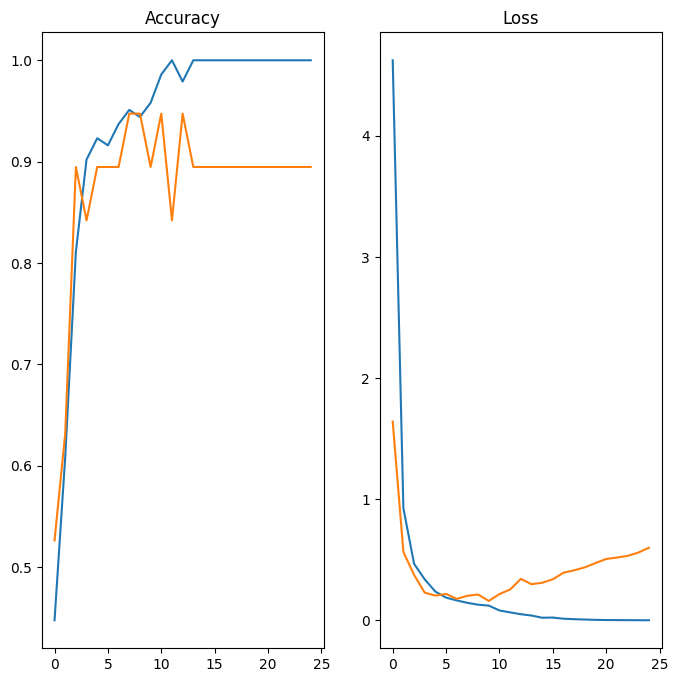

In [13]:
epochs_range = range(epochs_size)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Testing

In [15]:
image = 'a5.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [16]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 270ms/step


In [17]:
score = tf.nn.softmax(predict)

In [18]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 99.96


Save the model

In [19]:
model.save('Image_classify.keras')